### IMPORTING LIBRARIES

In [67]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

### LOADING DATASET

In [69]:
df = pd.read_csv('/content/drive/MyDrive/sms.csv',encoding = "latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [70]:
df.drop([df.columns[col] for col in range(2,5)], axis=1, inplace=True)
df.rename(columns={'v1': 'ham_spam'}, inplace=True)
df

,ham_spam,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### DATA VISUALIZATION

In [72]:
df.ham_spam.value_counts()

ham     4825
spam     747
Name: ham_spam, dtype: int64

<Axes: >

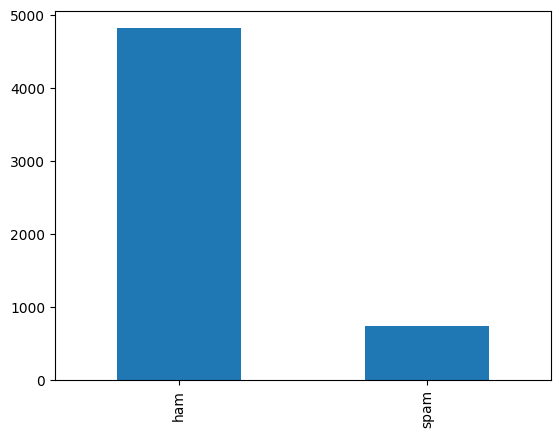

In [73]:
df.ham_spam.value_counts().plot.bar()

### LABEL ENCODING

In [75]:
encoder = LabelEncoder()
df['ham_spam'] = encoder.fit_transform(df["ham_spam"])

### TEXT VECTORIZATION

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

### TRAIN-TEST SPLIT

In [77]:
y = df['ham_spam']
df = df.drop('ham_spam',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(df, y, train_size = 0.8)

### TEXT VECTORIZING FOR TRAIN AND TEST SETS

In [78]:
X_train_vectorised = vect.fit_transform(X_train['v2'])
X_test_vectorised = vect.transform(X_test['v2'])

### MODEL TRAINING AND PREDICTION

In [88]:
log = LogisticRegression()
log.fit(X_train_vectorised,y_train)
log_pre = log.predict(X_test_vectorised)

In [89]:
sv = SVC()
sv.fit(X_train_vectorised,y_train)
sv_pre = sv.predict(X_test_vectorised)

In [90]:
mlp = MLPClassifier(hidden_layer_sizes=(128,128))
mlp.fit(X_train_vectorised,y_train)
mlp_pre = mlp.predict(X_test_vectorised)

### MODEL EVALUATION

In [91]:
print(f'accuracy of Logistic Regression : {log.score(X_test_vectorised,y_test)} ')
print(f'accuracy of SVM : {sv.score(X_test_vectorised,y_test)} ')
print(f'accuracy of Neural Network : {mlp.score(X_test_vectorised,y_test)} ')

accuracy of Logistic Regression : 0.9713004484304932 
accuracy of SVM : 0.9856502242152466 
accuracy of Neural Network : 0.9883408071748879 


In [92]:
print(f'F1 score of Logistic Regression : {f1_score(y_test,log_pre)} ')
print(f'F1 score of SVM : {f1_score(y_test,sv_pre)} ')
print(f'F1 score of Neural Network : {f1_score(y_test,mlp_pre)} ')

F1 score of Logistic Regression : 0.8823529411764706 
F1 score of SVM : 0.944055944055944 
F1 score of Neural Network : 0.9547038327526132 


### MODEL COMPARISON

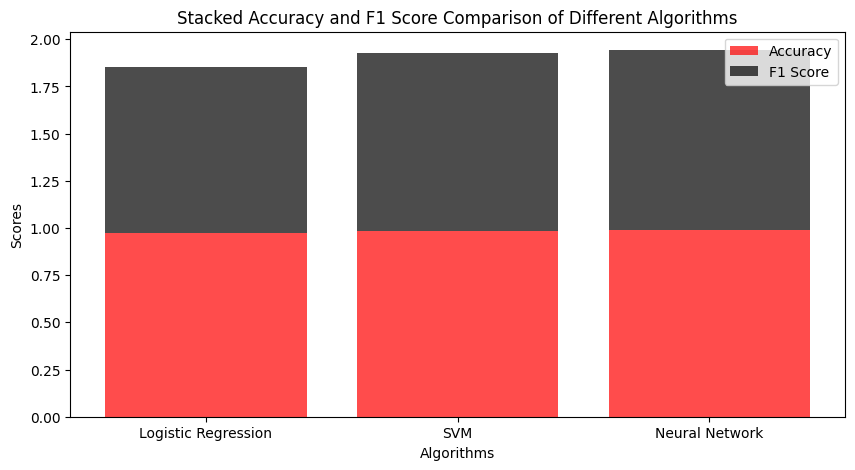

In [93]:
# Accuracy and F1 scores
accuracies = [log.score(X_test_vectorised, y_test), sv.score(X_test_vectorised, y_test), mlp.score(X_test_vectorised, y_test)]
f1_scores = [f1_score(y_test, log_pre), f1_score(y_test, sv_pre), f1_score(y_test, mlp_pre)]

# Labels and positions
labels = ['Logistic Regression', 'SVM', 'Neural Network']
x = np.arange(len(labels))

# Bar chart for Stacked Accuracy and F1 Score
plt.figure(figsize=(10, 5))

plt.bar(x, accuracies, color='red', alpha=0.7, label='Accuracy')
plt.bar(x, f1_scores, bottom=accuracies, color='black', alpha=0.7, label='F1 Score')

plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('Stacked Accuracy and F1 Score Comparison of Different Algorithms')
plt.xticks(x, labels)
plt.legend()
plt.show()